# Multi Layer Perceptron or Artificial Neural Network

In [742]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [743]:
df = pd.read_csv("/content/dlbcl-fl.csv")

df.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
1,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
2,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,DLBCL
3,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,DLBCL
4,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,DLBCL


In [744]:
classes = df['class']
classes.unique()

array(['DLBCL', 'FL'], dtype=object)

In [745]:
df['class'].value_counts()

DLBCL    58
FL       19
Name: class, dtype: int64

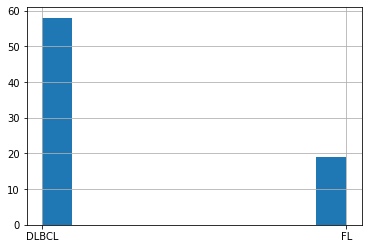

In [746]:
df['class'].hist()

In [747]:
df['class'] = df['class'].map(lambda x: 0 if x == 'DLBCL' else 1)

df.head(5)

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,0
1,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,0
2,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,0
3,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,0
4,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,0


In [748]:
df['class'].unique()

array([0, 1])

In [749]:
X = df.drop(['class'], axis=1)
y = df['class']

In [750]:
X.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-1,-45,176,97,-57,233,265,945,56,819,...,132,1036,-161,1523,-72,897,366,3,76,-28
1,25,-17,531,353,122,155,209,1688,42,639,...,147,4254,-75,6056,-68,737,81,-4,41,-45
2,73,91,257,80,614,507,760,2252,196,863,...,169,1934,-129,2901,-9,946,450,38,164,-62
3,267,41,202,138,198,355,245,1469,170,384,...,13,2469,93,2465,-119,339,321,-63,73,-13
4,16,24,187,39,145,254,571,930,-11,439,...,69,608,-39,1667,-87,721,213,15,155,-26


In [751]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Split the dataset into train test

In [752]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

y_train.head()

37    0
12    0
23    0
71    1
63    1
Name: class, dtype: int64

In [753]:
sl = StandardScaler()
X_train = sl.fit_transform(X_train)
X_test = sl.fit_transform(X_test)

In [754]:
X_train

array([[ 0.19999096,  0.0831348 ,  0.03381961, ...,  0.46931029,
         0.57396289,  0.50101306],
       [ 0.22258253,  1.11225825, -0.16491617, ..., -1.05926216,
        -1.80770275, -0.53679971],
       [ 0.71959709,  0.09553388,  0.10055924, ...,  0.42675143,
         0.52391037,  0.67994629],
       ...,
       [ 0.215052  , -0.25783984,  0.76202311, ..., -0.50245039,
        -0.99017829, -0.93695949],
       [ 1.17142851,  0.34351543, -0.37106747, ...,  0.29552827,
         0.20691109,  0.63765298],
       [ 0.17739939,  0.25052235, -0.50899604, ...,  0.61117316,
        -0.13928549,  0.59210634]])

## MLP Model

In [755]:
model = Sequential([
    Dense(16, activation='relu', input_dim=7070),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.build()

In [756]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 16)                113136    
                                                                 
 dense_152 (Dense)           (None, 16)                272       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_153 (Dense)           (None, 1)                 17        
                                                                 
Total params: 113,425
Trainable params: 113,425
Non-trainable params: 0
_________________________________________________________________


In [757]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [758]:
early_stopping = EarlyStopping(
                        monitor='val_loss', 
                        min_delta=0, 
                        patience=5, 
                        verbose=0, 
                        mode='auto', 
                        baseline=None, 
                        restore_best_weights=True
                    )

In [759]:
EPOCHS = 50

history = model.fit(X_train, y_train,
                    validation_split=0.33,
                    epochs=EPOCHS,
                    verbose=1,
                    batch_size=5,
                    shuffle=True,
                    callbacks=[early_stopping])

Epoch 1/50
8/8 [==============================] - 1s 27ms/step - loss: 0.8419 - accuracy: 0.6250 - val_loss: 0.8649 - val_accuracy: 0.8571
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2663 - accuracy: 0.9000 - val_loss: 0.3618 - val_accuracy: 0.9524
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2348 - accuracy: 0.9000 - val_loss: 0.1561 - val_accuracy: 0.9524
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2919 - accuracy: 0.8750 - val_loss: 0.0664 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 8/50
8/8 [=================

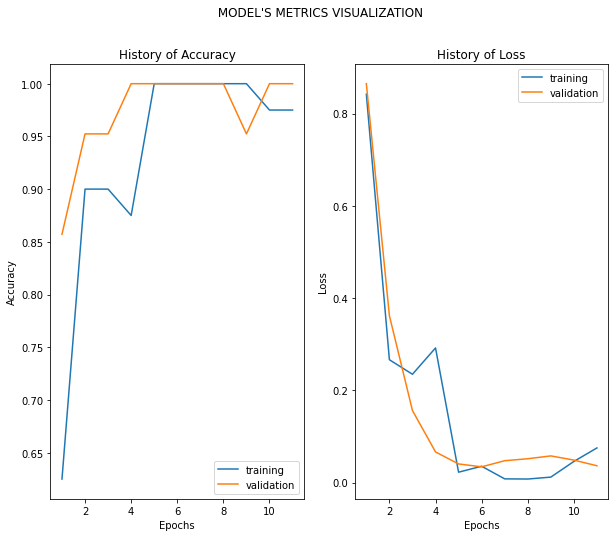

In [760]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (10, 8))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()
    

Train_Val_Plot(history.history['accuracy'], history.history['val_accuracy'],
               history.history['loss'], history.history['val_loss'])

In [761]:
loss, accuracy = model.evaluate(X_test, y_test)

print(loss, accuracy)

1/1 [==============================] - 0s 22ms/step - loss: 0.2107 - accuracy: 0.9375
0.21065753698349 0.9375


In [762]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 58ms/step


In [763]:
cnf_matrix = tf.math.confusion_matrix(y_test, y_pred, 2).numpy()
cnf_matrix

array([[12,  0],
       [ 4,  0]], dtype=int32)

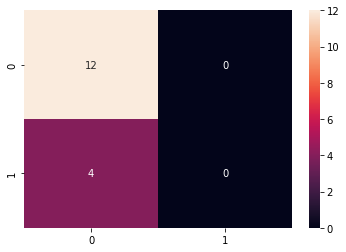

In [764]:
import seaborn as sns

sns.heatmap(cnf_matrix, annot=True)